In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/project for resume/train'
valid_path = '/content/drive/MyDrive/project for resume/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/project for resume/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project for resume/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project for resume/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 634s 10s/step - loss: 3.1801 - accuracy: 0.6526 - val_loss: 0.1975 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 36s 599ms/step - loss: 0.7937 - accuracy: 0.8923 - val_loss: 0.2987 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 35s 572ms/step - loss: 0.7269 - accuracy: 0.8763 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 36s 591ms/step - loss: 0.6196 - accuracy: 0.9180 - val_loss: 0.3350 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 36s 596ms/step - loss: 0.6443 - accuracy: 0.9218 - val_loss: 0.3741 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 36s 597ms/step - loss: 0.5922 - accuracy: 0.9180 - val_loss: 2.2528e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 37s 600ms/step - loss: 0.4273 - accuracy: 0.9434 - val_loss: 4.9970e-04 - val_accuracy:

In [15]:
import matplotlib.pyplot as plt

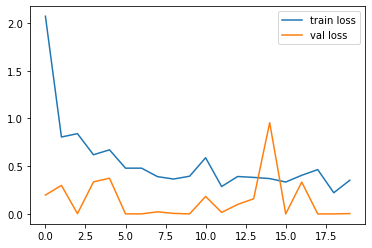

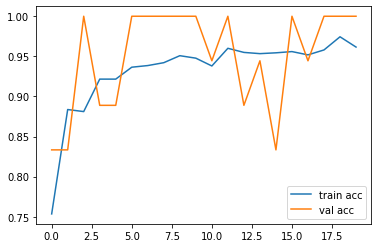

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[1.9822369e-32, 1.0000000e+00, 9.7395860e-24, 8.8050889e-25],
       [6.1895067e-18, 4.1521688e-13, 1.0200764e-24, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.6417121e-26],
       [9.1790064e-15, 1.3884916e-12, 1.0000000e+00, 1.5006034e-25],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.9563763e-17, 0.0000000e+00, 1.0000000e+00, 2.3847489e-32],
       [4.0547339e-19, 3.7273916e-29, 7.8815963e-28, 1.0000000e+00],
       [2.4834508e-14, 9.7354348e-14, 9.9999964e-01, 3.5771845e-07],
       [6.4987004e-02, 4.2756631e-15, 9.3501306e-01, 1.8769229e-12],
       [1.0000000e+00, 2.8966543e-38, 6.9030444e-27, 1.0077068e-11],
       [2.6013073e-19, 9.9999583e-01, 2.6657732e-17, 4.1753719e-06],
       [3.0530839e-33, 1.0000000e+00, 3.1253054e-34, 5.2558095e-19],
       [1.9124857e-10, 1.2097317e-16, 1.0000000e+00, 1.4229807e-13],
       [2.4000726e-24, 5.3894771e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 2, 3, 3, 0, 0])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
# now try with one only 1 image 

In [47]:
img=load_img('/content/drive/MyDrive/project for resume/test/diseased cotton plant/dd (328).jpg',target_size=(224,224))

In [54]:
y=image.img_to_array(img)

In [56]:
y.shape

(224, 224, 3)

In [57]:
import numpy as np
y=np.expand_dims(y,axis=0)
img_data=preprocess_input(y)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

array([[4.5196408e-26, 1.0000000e+00, 3.2219720e-24, 2.2274082e-22]],
      dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)

In [60]:

a


array([1])

In [70]:
training_set.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [71]:
test_set.classes

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)